# Crack Detection

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Set dimensions according to the size of the image under test

In [2]:
# img_size = 128
img_size = 256

#### Insert the path to the image file you want to predict

In [3]:
img_to_predict = "./1.jpg"

In [4]:
# function to return the correct shape from a image path
def prepare_image(file):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (img_size, img_size))
    return img.reshape(-1, img_size, img_size, 1)

In [8]:
prepare_image(img_to_predict).shape

(1, 256, 256, 1)

#### Load the pretrained model

In [9]:
model = tf.keras.models.load_model("./Concrete_Crack_Classification_model.model")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


#### Predict

In [10]:
prediction = model.predict([prepare_image(img_to_predict)])

In [12]:
# Setting the threshold
if prediction[0][0] <= .5:
    pred_text = "Crack with confidence of {:.2f}%".format((1 - prediction[0][0]) * 100)
elif prediction[0][0] > .5:
    pred_text = "Intact with confidence of {:.2f}%".format((1 - prediction[0][0]) * 100)
else:
    print("\nSomething went wrong...")

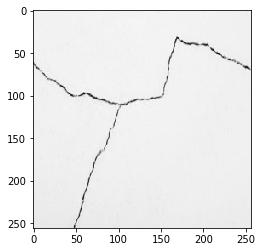

In [13]:
plt.imshow(cv2.resize(cv2.imread(img_to_predict), (img_size, img_size)))

In [14]:
print(pred_text)

Crack with confidence of 100.00%


## Footnote: Try for other images by changing providing the path and re-running the entire kernel